In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
#this code is not working
# network = TwoLaternNet(...)
# optimizer = SGD()

for i in range(10000):
    '''
    x_batch, t_batch = get_mini_batch(...) #get mini batch
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    '''

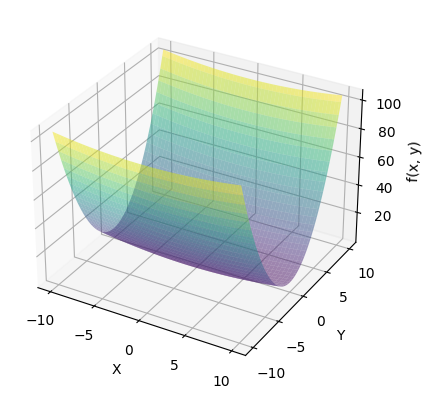

In [18]:
# create f(x, y) = (1/20)x^2 + y^2 3d graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (1/20) * x**2 + y**2

# Create the grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)');

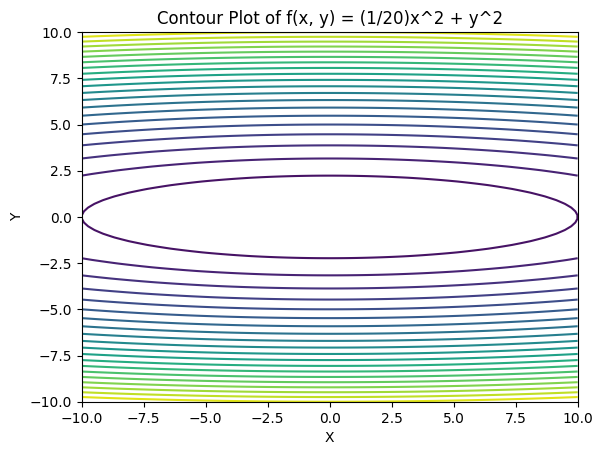

In [17]:
# Create the contour plot
def f(x, y):
    return (1/20) * x**2 + y**2

# Create the grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


plt.figure()
plt.contour(X, Y, Z, levels=20, cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y) = (1/20)x^2 + y^2');

In [16]:
# SGD : Stochastic Gradient Descent
#
# Momentum
#
# AdaGrad
#
# Adam


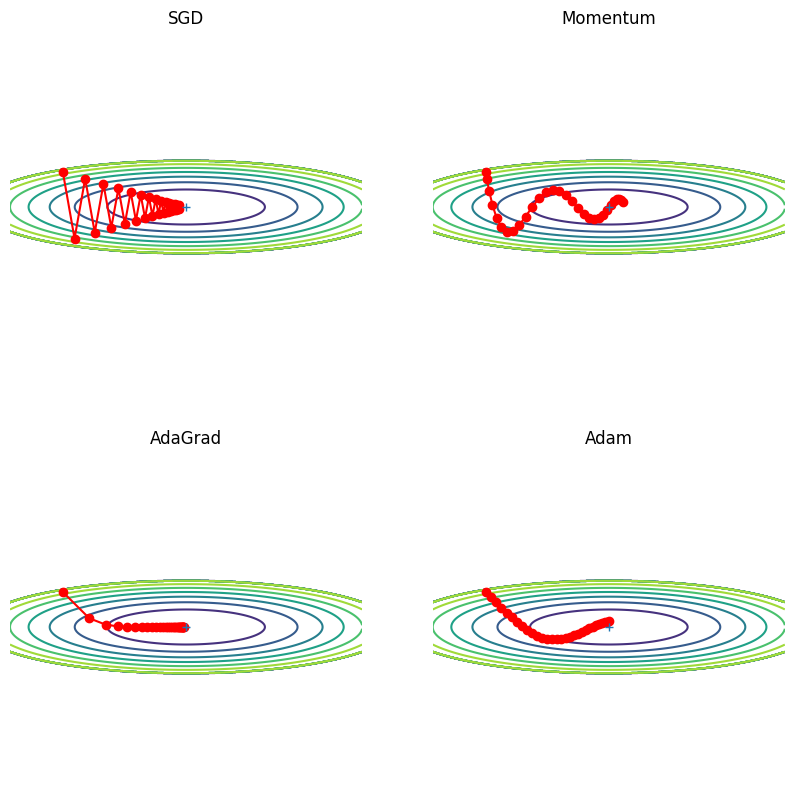

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 외곽선 단순화
mask = Z > 7
Z[mask] = 0

plt.figure(figsize=(10, 10))
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('off')

plt.show()


===========iteration:0===========
SGD:2.4311605490402233
Momentum:2.399719672066964
AdaGrad:2.314726368109304
Adam:2.2955886531804532
===========iteration:100===========
SGD:1.5151993886904043
Momentum:0.37615410779106095
AdaGrad:0.11609659225904767
Adam:0.2990795692357957
===========iteration:200===========
SGD:0.7151926327708849
Momentum:0.2698918449703167
AdaGrad:0.11668828380517984
Adam:0.21642173375609175
===========iteration:300===========
SGD:0.46726849536939774
Momentum:0.1725013481044227
AdaGrad:0.1178154709122482
Adam:0.12857886583444267
===========iteration:400===========
SGD:0.46667943712784493
Momentum:0.127820168021262
AdaGrad:0.050788568027316655
Adam:0.043776884200565414
===========iteration:500===========
SGD:0.42201231662025396
Momentum:0.18814272574595403
AdaGrad:0.09980491062058287
Adam:0.1340011905931744
===========iteration:600===========
SGD:0.2901945898901045
Momentum:0.19749650460742985
AdaGrad:0.10885564880670373
Adam:0.14015898889707187
===========iteration:7

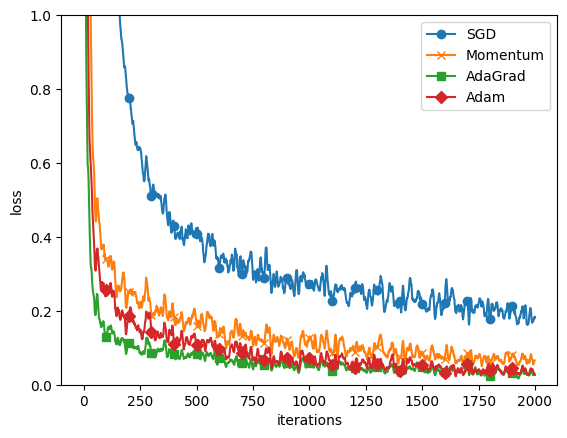

In [27]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

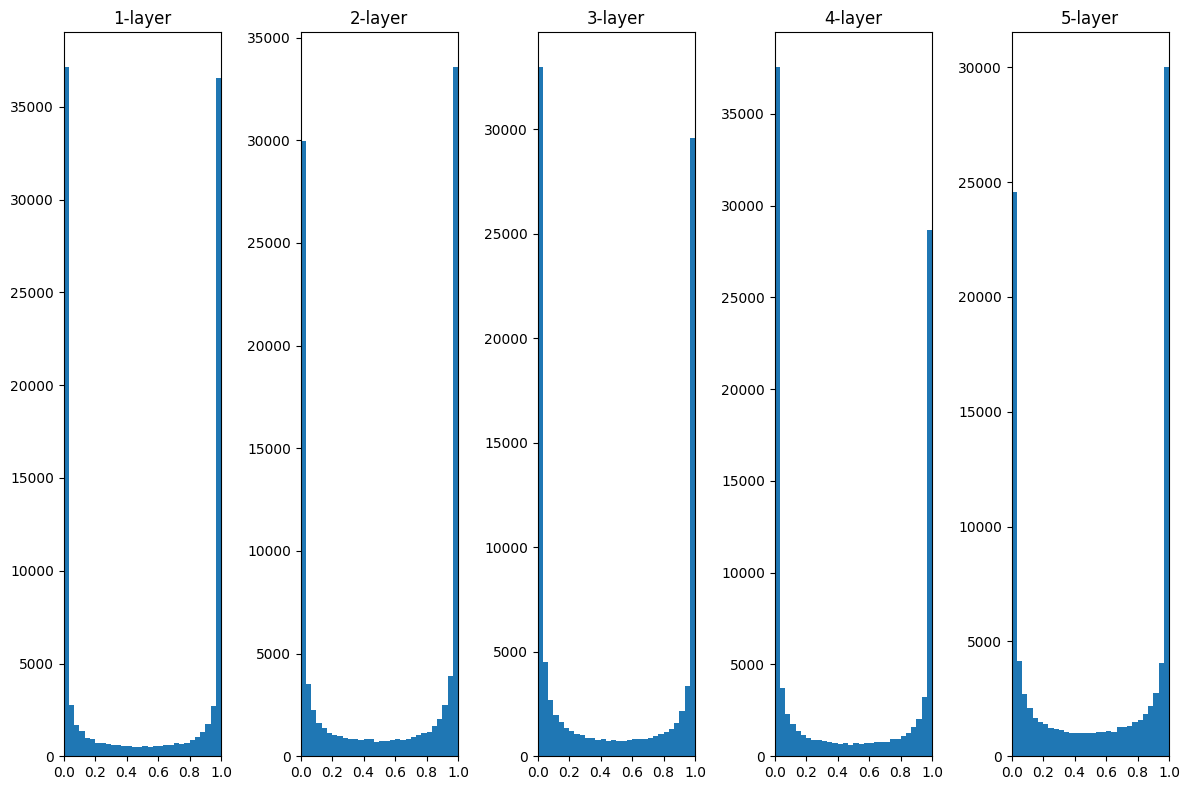

In [25]:
# weight initiall value
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

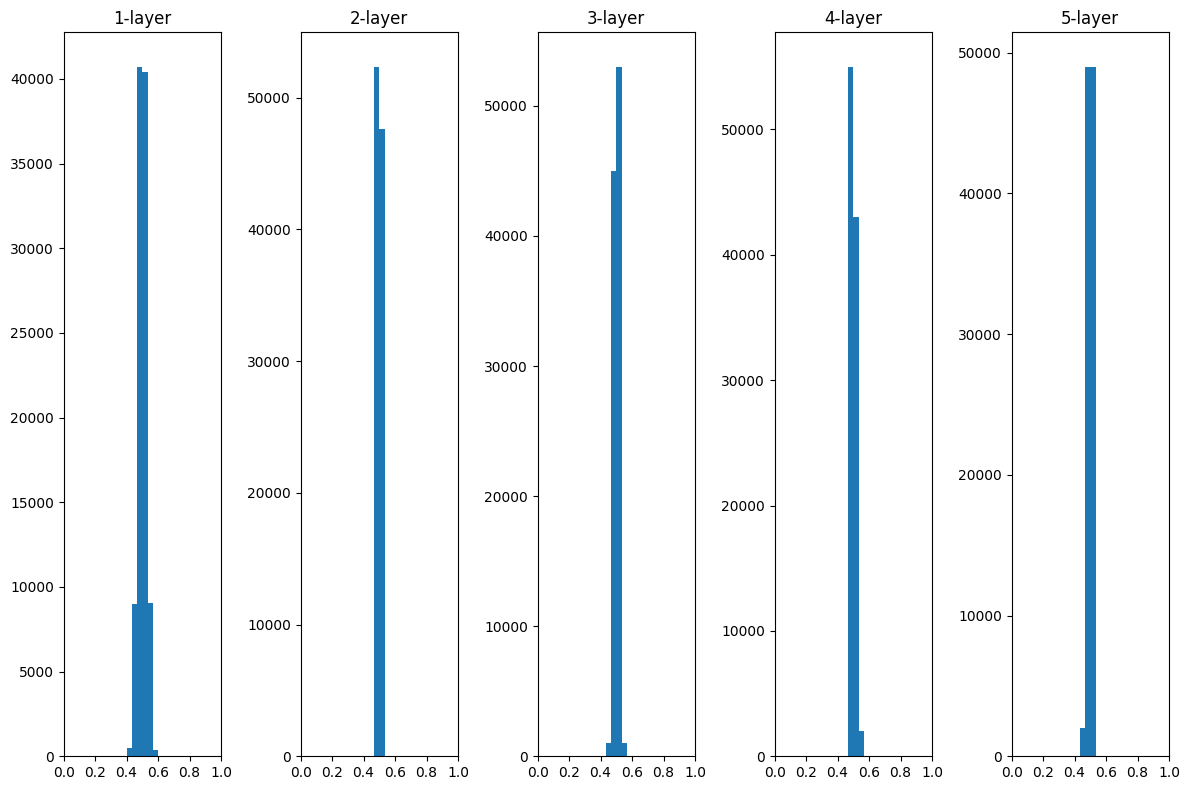

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

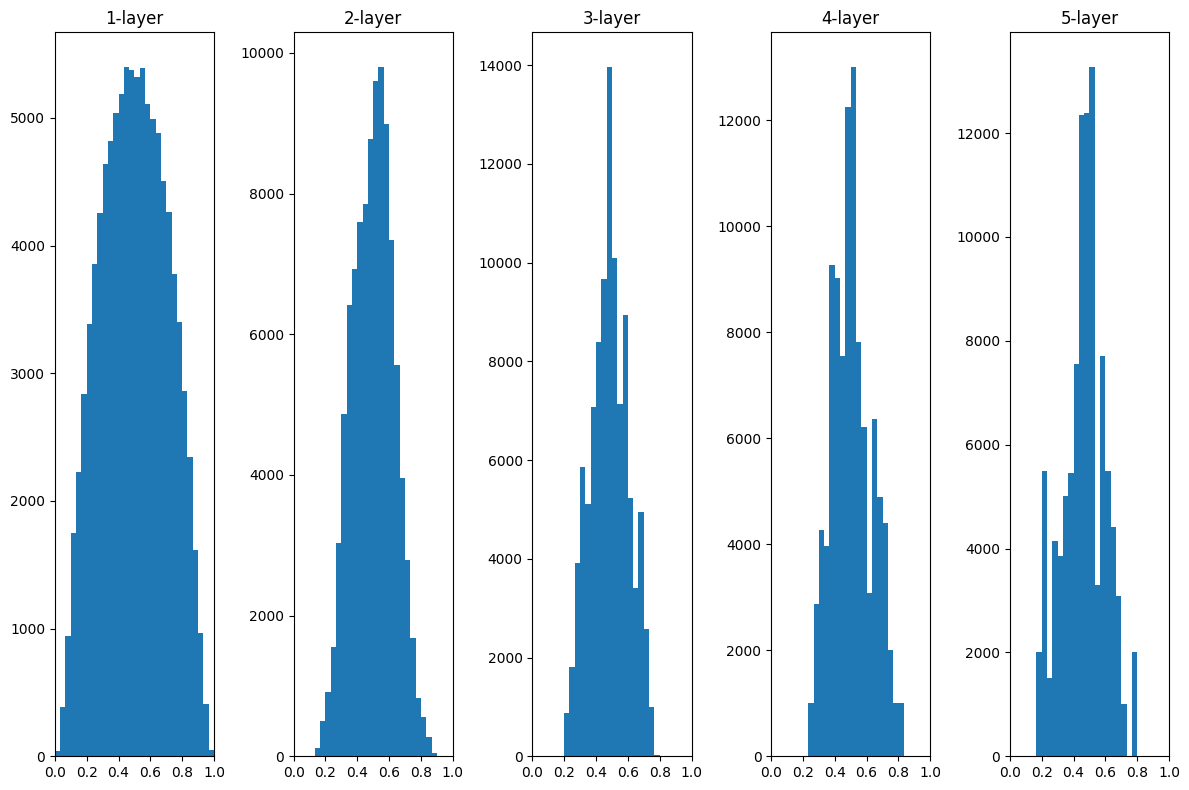

In [47]:
# Xviear initial value
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

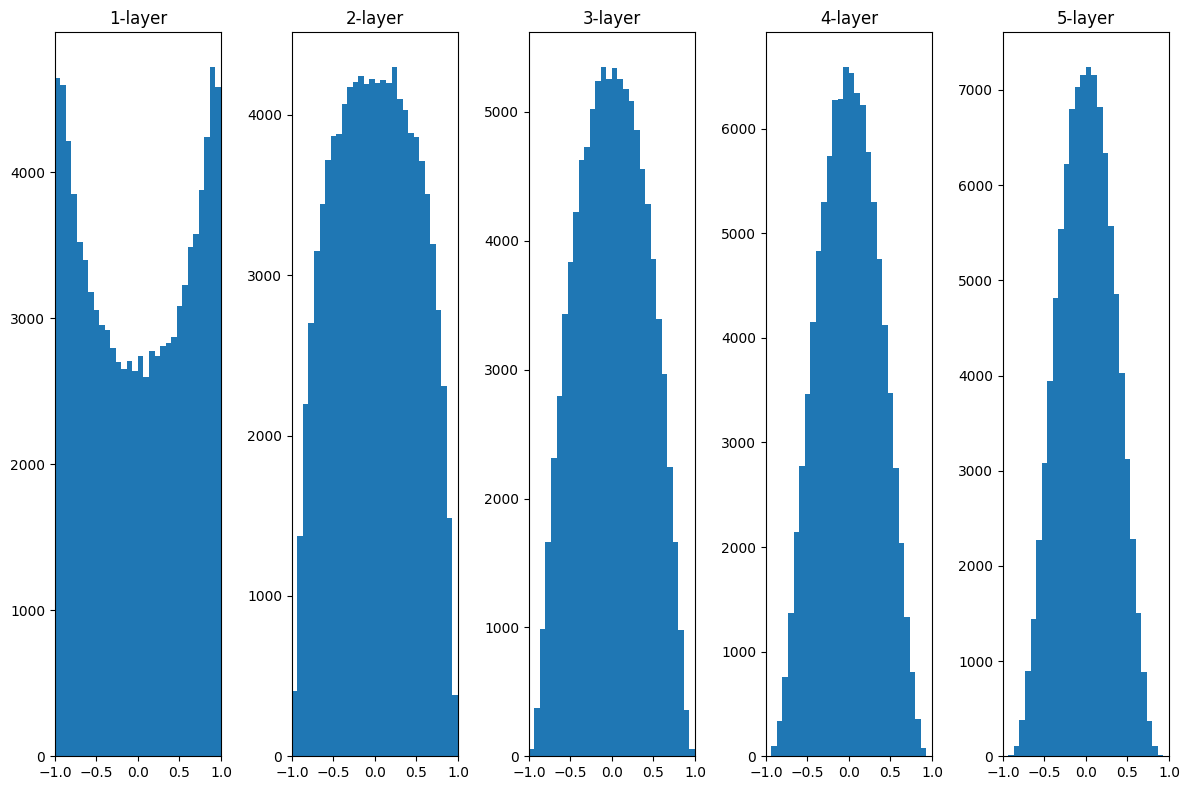

In [46]:
# tanh initial value / This function is not desirable

def tanh(x):
    return np.tanh(x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)
    z = tanh(a)
    activations[i] = z

plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(-1, 1))
    plt.axis([-1.0, 1.0, 0, None])
    plt.xticks([-1, -0.5, 0, 0.5, 1])
    plt.tight_layout()

plt.show()


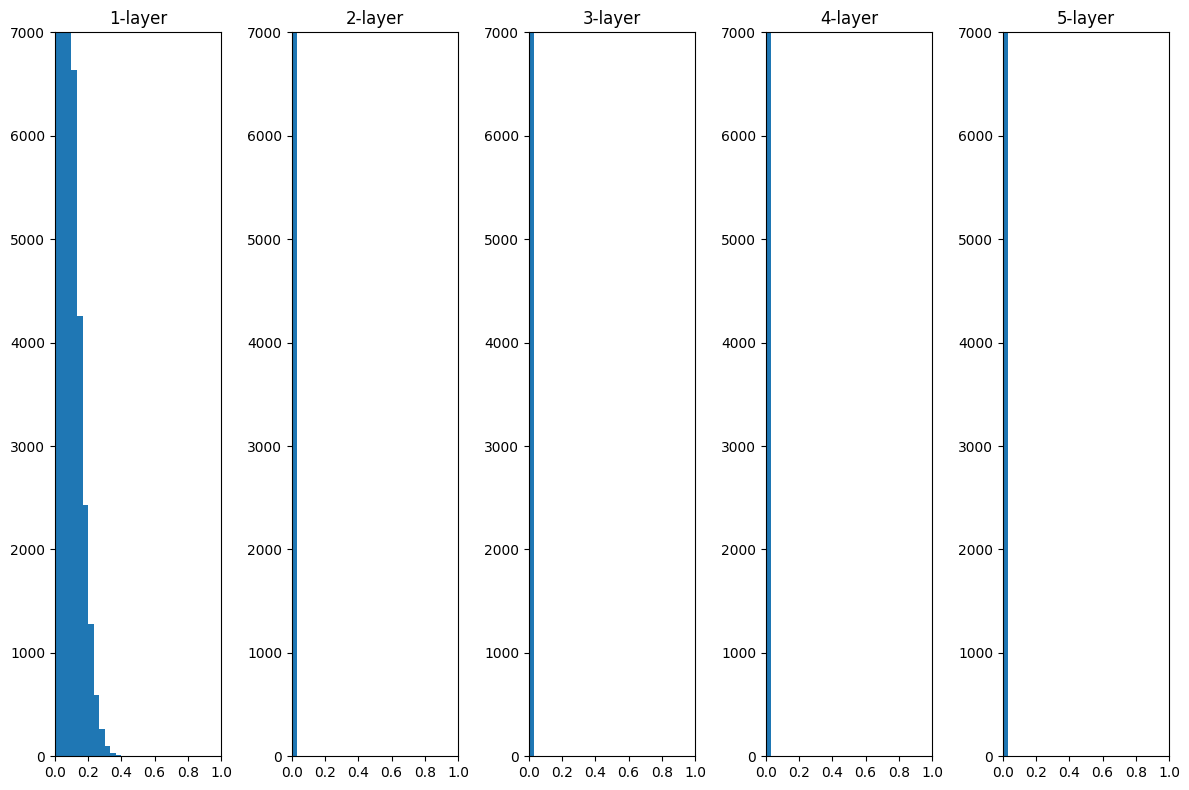

In [37]:
# ReLU and HE initial value

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

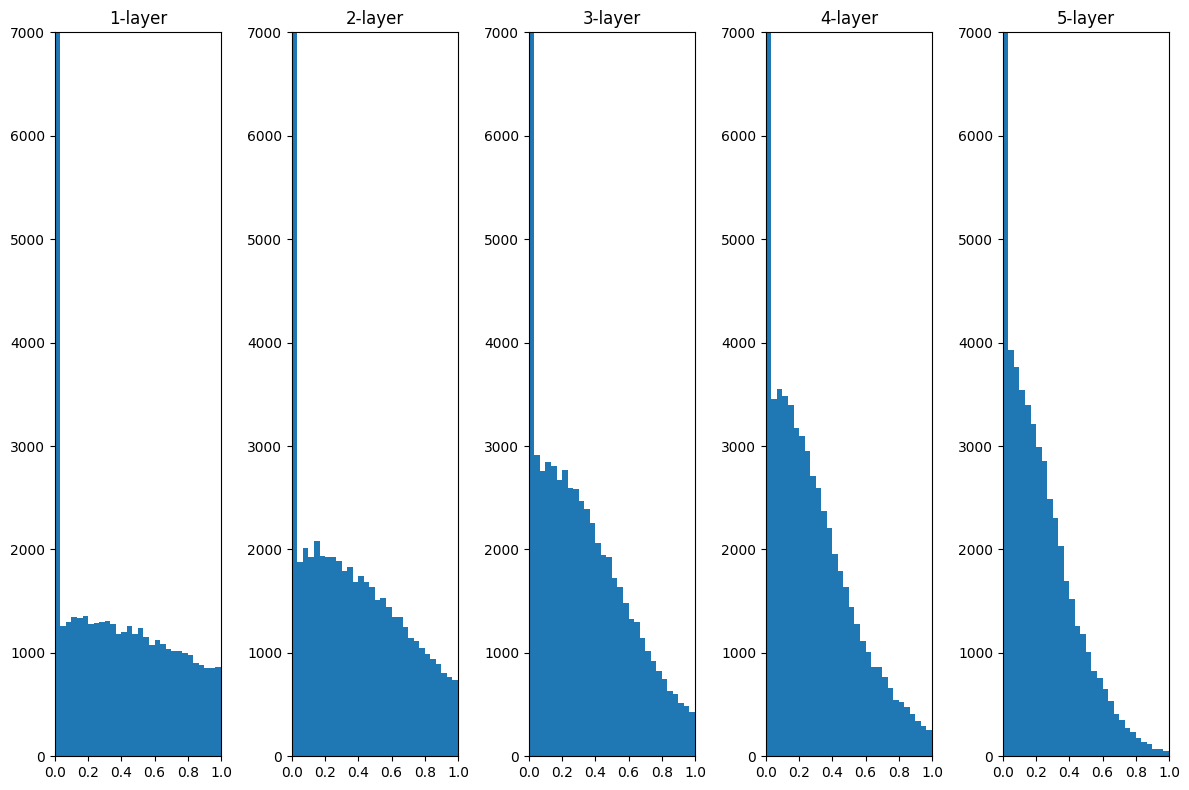

In [45]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

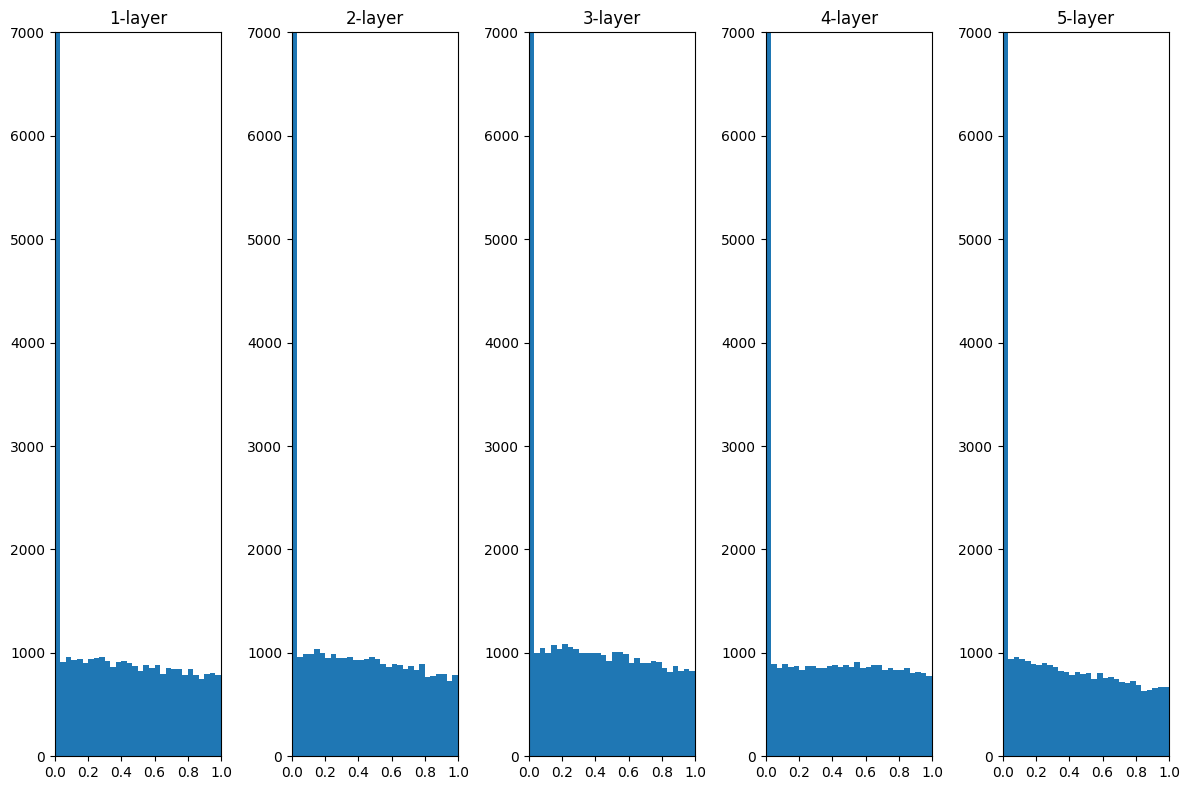

In [48]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

===========iteration:0===========
std=0.01:2.3024283059210617
Xavier:2.2976092512073847
He:2.530319270850061
===========iteration:100===========
std=0.01:2.3022896344156596
Xavier:2.240067019348553
He:1.585593315224647
===========iteration:200===========
std=0.01:2.3018850680952885
Xavier:2.1006927078005053
He:0.8252162234452162
===========iteration:300===========
std=0.01:2.300800369335051
Xavier:1.8401994466312828
He:0.6051097636788267
===========iteration:400===========
std=0.01:2.3001809489405547
Xavier:1.3228651499076087
He:0.5142161066651145
===========iteration:500===========
std=0.01:2.300556311616955
Xavier:0.6959758294547439
He:0.21277289324722087
===========iteration:600===========
std=0.01:2.300347510124101
Xavier:0.5940538466753016
He:0.3078722739528203
===========iteration:700===========
std=0.01:2.300368999963069
Xavier:0.6390068607082297
He:0.3898544581292047
===========iteration:800===========
std=0.01:2.296080453279229
Xavier:0.4357128246004113
He:0.27926131465297344


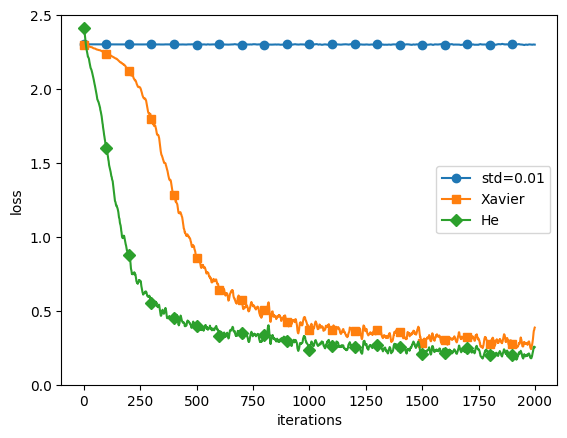

In [49]:
# coding: utf-8
import os
import sys

from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:19 | 0.117 - 0.418
============== 2/16 ==============
epoch:19 | 0.097 - 0.522
============== 3/16 ==============
epoch:19 | 0.895 - 0.591
============== 4/16 ==============
epoch:19 | 0.88 - 0.788
============== 5/16 ==============
epoch:19 | 0.238 - 0.869
============== 6/16 ==============
epoch:19 | 0.162 - 0.939
============== 7/16 ==============
epoch:19 | 0.117 - 0.989
============== 8/16 ==============
epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:19 | 0.117 - 0.984
============== 13/16 ==============
epoch:19 | 0.117 - 0.619
============== 14/16 ==============
epoch:19 | 0.117 - 0.525
============== 15/16 ==============
epoch:19 | 0.117 - 0.432
============== 16/16 ==============
epoch:19 | 0.117 - 0.433


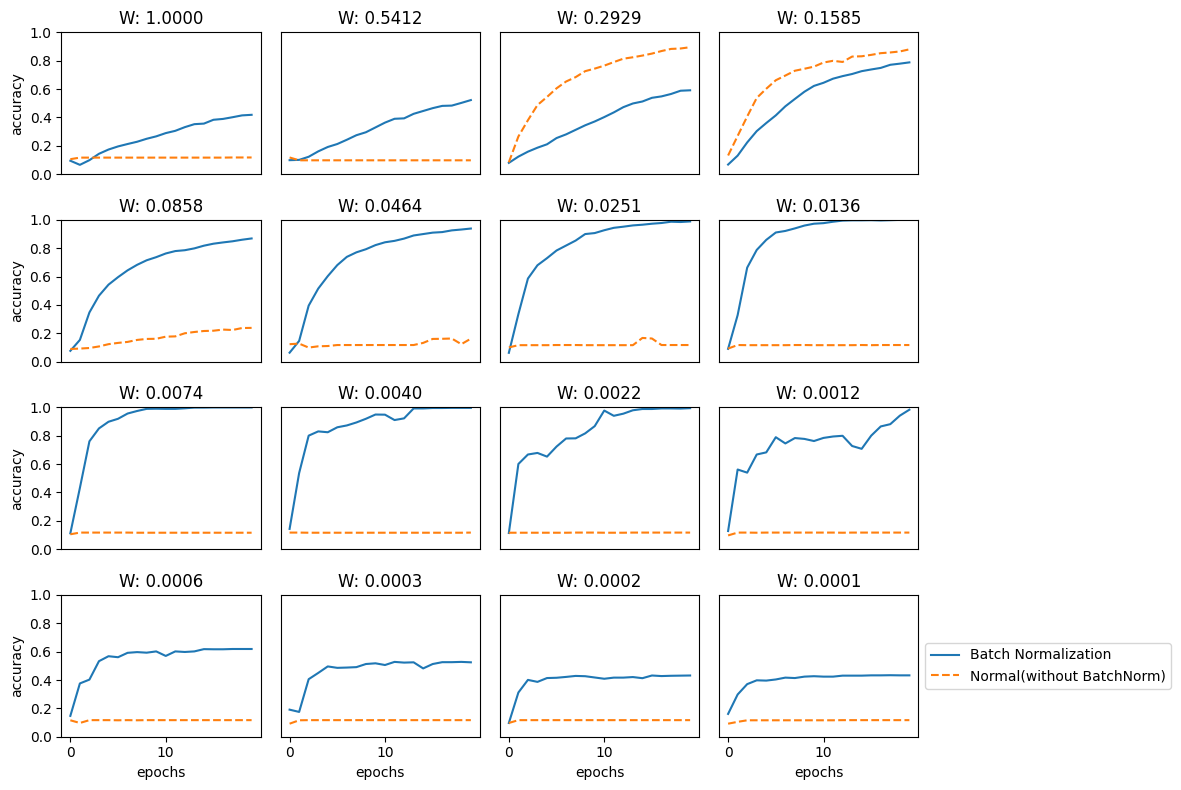

In [67]:
# batch normalization

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            if epoch_cnt == 19:
                print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list
    
plt.figure(figsize=(12, 8))

# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title(f"W: {w:.4f}")
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
         
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.tight_layout()    
plt.show()

In [ ]:
# overfitting
